In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('adult.data.csv')
#1 сколько мужчин и женщин
print(data['sex'].value_counts())

Male      21790
Female    10771
Name: sex, dtype: int64


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('adult.data.csv')
#2 Каков средний возраст (признак age) женщин
print(data[(data['sex'] == 'Female')].age.mean())

36.85823043357163


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('adult.data.csv')
#3 Какова доля граждан Германии (признак native-country)
print(data['native_country'].value_counts()['Germany'] / len(data) * 100)

0.42074874850281013


(array([ 2108.,   433.,   501.,   646.,  1581.,  1382.,  5768., 10501.,
         1774.,  7867.]),
 array([ 0. ,  1.5,  3. ,  4.5,  6. ,  7.5,  9. , 10.5, 12. , 13.5, 15. ]),
 <a list of 10 Patch objects>)

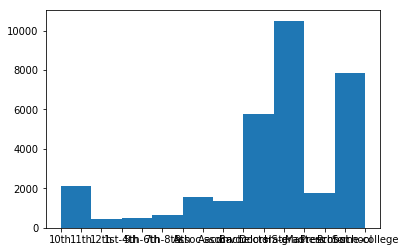

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('adult.data.csv')
#4 Постройте гистограмму распределения (bar plot) образования людей
plt.hist(x = data.education)

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('adult.data.csv')
# 5 Каковы средние значения и среднеквадратичные отклонения возраста тех, кто получает
#более 50K в год (признак salary) и тех, кто получает менее 50K в год?
#>50K среднее отколнения значение возраста
print(round(data.loc[data.salary == '>50K']["age"].describe()[1],0))
#>50K среднеквадратичные отклонения возраста
print(round(data.loc[data.salary == '>50K']["age"].describe()[2],0))
#<=50K среднее отколнения значение возраста
print(round(data.loc[data.salary == '<=50K']["age"].describe()[1],0))
#<=50K среднеквадратичные отклонения возраста
print(round(data.loc[data.salary == '<=50K']["age"].describe()[2],0))

44.0
11.0
37.0
14.0


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('adult.data.csv')
#6 Правда ли, что люди, которые получают больше 50k, имеют как минимум высшее
#образование? (признак education - Bachelors, Prof-school, Assoc-acdm, Assoc-voc,
#Masters или Doctorate)
#Получаем список (без повторений) и видим,что это неправда
print(data.loc[data.salary == '>50K']["education"].unique())

['HS-grad' 'Masters' 'Bachelors' 'Some-college' 'Assoc-voc' 'Doctorate'
 'Prof-school' 'Assoc-acdm' '7th-8th' '12th' '10th' '11th' '9th' '5th-6th'
 '1st-4th']


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('adult.data.csv')
#7. Выведите статистику возраста для каждой расы (признак race) и каждого пола.
#Используйте groupby и describe. Найдите таким образом максимальный возраст мужчин
#расы Amer-Indian-Eskimo.
print(data.groupby(['race','sex']).age.describe())

                             count       mean        std   min   25%   50%  \
race               sex                                                       
Amer-Indian-Eskimo Female    119.0  37.117647  13.114991  17.0  27.0  36.0   
                   Male      192.0  37.208333  12.049563  17.0  28.0  35.0   
Asian-Pac-Islander Female    346.0  35.089595  12.300845  17.0  25.0  33.0   
                   Male      693.0  39.073593  12.883944  18.0  29.0  37.0   
Black              Female   1555.0  37.854019  12.637197  17.0  28.0  37.0   
                   Male     1569.0  37.682600  12.882612  17.0  27.0  36.0   
Other              Female    109.0  31.678899  11.631599  17.0  23.0  29.0   
                   Male      162.0  34.654321  11.355531  17.0  26.0  32.0   
White              Female   8642.0  36.811618  14.329093  17.0  25.0  35.0   
                   Male    19174.0  39.652498  13.436029  17.0  29.0  38.0   

                             75%   max  
race               sex

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('adult.data.csv')
#8. Среди кого больше доля зарабатывающих много (>50K): среди женатых или холостых
#мужчин (признак marital-status)? Женатыми считаем тех, у кого marital-status начинается
#с Married (Married-civ-spouse, Married-spouse-absent или Married-AF-spouse), остальных
#считаем холостыми.
print(data.loc[data.salary == '>50K']["marital_status"].value_counts())

Married-civ-spouse       6692
Never-married             491
Divorced                  463
Widowed                    85
Separated                  66
Married-spouse-absent      34
Married-AF-spouse          10
Name: marital_status, dtype: int64


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('adult.data.csv')
#9. Какое максимальное число часов человек работает в неделю (признак hours-per-week)?
#Сколько людей работают такое количество часов и каков среди них процент
#зарабатывающих много?
maximum = data["hours_per_week"].max()
print(maximum)
count_people = data[data["hours_per_week"] == maximum].shape[0]
print(count_people)
dolya = data.loc[(data.salary == ">50K") & (data["hours_per_week"] == maximum)].shape[0] / count_people
print(dolya)

99
85
0.29411764705882354


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('adult.data.csv')
#10. Посчитайте среднее время работы (hours-per-week) зарабатывающих мало и много
#(salary) для каждой страны (native-country).
print(pd.crosstab(data.salary, data["native_country"], values=data["hours_per_week"], aggfunc=np.mean))

native_country          ?   Cambodia     Canada      China   Columbia  \
salary                                                                  
<=50K           40.164760  41.416667  37.914634  37.381818  38.684211   
>50K            45.547945  40.000000  45.641026  38.900000  50.000000   

native_country       Cuba  Dominican-Republic    Ecuador  El-Salvador  \
salary                                                                  
<=50K           37.985714           42.338235  38.041667    36.030928   
>50K            42.440000           47.000000  48.750000    45.000000   

native_country    England     ...       Portugal  Puerto-Rico   Scotland  \
salary                        ...                                          
<=50K           40.483333     ...      41.939394    38.470588  39.444444   
>50K            44.533333     ...      41.500000    39.416667  46.666667   

native_country     South     Taiwan   Thailand  Trinadad&Tobago  \
salary                                    